In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

# Data Processing

In [2]:
file=pd.ExcelFile('Credit Scoring.xlsm')
data=file.parse('Data')

In [3]:
data

,Résulat net,Fonds Propres/Encours,Charges/CA,Résultat net/Fonds Propres,Fonds Propres/Bilan,Dette Fi/Fonds Propres,Evolution Encours/REX,Score
0,1449600.00,0.003222,0.837451,0.082638,0.860726,0.016314,1.308658,0.600
1,665800.00,0.000801,0.807155,0.260008,0.798466,0.001110,1.108114,0.500
2,-657611.00,0.000440,1.205964,-0.162618,0.916961,0.018416,1.403420,0.350
3,1199331.25,0.091247,0.807715,0.154007,0.706233,0.010373,0.441607,0.800
4,1663343.75,0.002507,0.833124,0.104299,0.856256,0.003284,0.943236,0.700
...,...,...,...,...,...,...,...,...
995,140722.50,0.005129,0.978074,0.012067,0.872477,0.023030,0.932064,0.800
996,-20689.00,0.000167,1.017298,-0.010849,0.579381,0.019702,1.387931,0.275
997,81833.75,0.000237,0.819454,0.086310,0.771366,0.014700,0.469176,0.650
998,-707105.00,0.000699,1.146379,-0.125287,0.730275,0.040898,1.312921,0.350


In [4]:
def normalize(data):
    normalized_data=(data-data.mean(axis=0))/data.std(axis=0)
    return normalized_data

def denormalize(values,data):
    denormalized_data=values*data.std(axis=0)+data.mean(axis=0)
    return denormalized_data


## Data Features

In [5]:
intervals = [0, 15, 30, 45, 60, 80, 100]
score_interval=[i for i in range(1,7)][::-1]
cluster = ['C', 'B', 'BB', 'BBB', 'AA', 'AAA']
dict_score=dict(zip(score_interval,cluster))

In [6]:
data['New Score'] = pd.cut(data['Score']*100, bins=intervals, labels=score_interval).astype('int')
normalized_data=normalize(data)

# Linear Regression

In [7]:
class LinearRegression:
    
    def __init__(self,X,Y):
        
        self.X=X
        self.Y=Y
        self.weights=np.ones(X.shape[1])
        self.bias=np.ones(1)
        self.cost=[]

    def cost_function(self):
        
        error=(self.X.dot(self.weights)+self.bias-self.Y)**2
        return np.sum(error)/(2*len(self.Y))

    def gradients(self,alpha):
        
        loss=(self.X.dot(self.weights)+self.bias)-self.Y
        weights_grad=self.X.T.dot(loss)/len(self.Y)
        bias_grad=np.sum(loss)/len(self.Y)

        self.weights=self.weights-alpha*weights_grad
        self.bias=self.bias-alpha*bias_grad

        return self.weights,self.bias
    
    def fit(self,num_iterations=3000,alpha=0.005):

        for i in range(num_iterations):
            self.cost.append(self.cost_function())
            weights,bias=self.gradients(alpha)
          
        prediction=self.X.dot(self.weights) + self.bias
        estimated_variance = np.sum((prediction - self.Y)**2) / (len(self.Y) - self.X.shape[1] - 1)
        XTX_inverse = np.linalg.inv(self.X.T.dot(self.X))
        cov_matrix = estimated_variance * XTX_inverse
         
        prediction_variance=np.sum((self.Y- prediction)**2)
        variance_of_y=np.sum((self.Y- np.mean(self.Y))**2)
        
        self.std_errors = np.sqrt(np.diag(cov_matrix))
        self.t_stat=self.weights/self.std_errors
        
        self.r2=1-prediction_variance/variance_of_y
        self.r2_adjusted=1-((1-self.r2)*(len(self.Y)-1))/(len(self.Y)-self.X.shape[1]-1)

        return weights,bias
        
    def predict(self,X):
        return (X.dot(self.weights)+self.bias)
    
    def error(self):
        predictions=self.predict(self.X)
        data_predicted=np.column_stack((predictions,self.Y))
        
        return data_predicted
    
    

In [8]:
def plot_cost(cost):
    plt.plot(cost)
    plt.title("MSE during optimization")
    plt.show()

In [9]:
def plot_error(error):
    fig = sns.histplot(data=error[:,0]-error[:,1], bins=30, kde=True)
    plt.ylabel("Frequency")
    plt.title("Difference between predicted values and real values")
    plt.show()

## 3 Dimensions example

In [10]:
normalized_data=normalize(data)

In [11]:
normalized_data

,Résulat net,Fonds Propres/Encours,Charges/CA,Résultat net/Fonds Propres,Fonds Propres/Bilan,Dette Fi/Fonds Propres,Evolution Encours/REX,Score,New Score
0,1.680182,-0.089245,-1.363967,0.782200,0.879554,-0.279457,0.095157,0.671386,-0.287630
1,0.840209,-0.153515,-1.576810,2.159020,0.555355,-0.955259,-0.022330,0.017810,-0.287630
2,-0.578048,-0.163096,1.224943,-1.121583,1.172387,-0.186000,0.150672,-0.962554,0.714564
3,1.411977,2.247327,-1.572873,1.336193,0.075076,-0.543513,-0.412796,1.978537,-1.289824
4,1.909244,-0.108230,-1.394370,0.950337,0.856281,-0.858600,-0.118922,1.324962,-1.289824
...,...,...,...,...,...,...,...,...,...
995,0.277500,-0.038628,-0.376053,0.234394,0.940746,0.019062,-0.125467,1.978537,-1.289824
996,0.104521,-0.170333,-0.100494,0.056509,-0.585475,-0.128850,0.141598,-1.452736,1.716758
997,0.214391,-0.168485,-1.490408,0.810702,0.414237,-0.351169,-0.396645,0.998174,-1.289824
998,-0.631089,-0.156205,0.806342,-0.831804,0.200264,0.813290,0.097654,-0.962554,0.714564


In [12]:
X=np.array(normalized_data.iloc[:,:-2].values.tolist())
Y=np.array(normalized_data.iloc[:,-2].values.tolist())

In [13]:
X=X.reshape(X.shape[0],-1)
X2=X[:,[-4,-2]]

In [14]:
regression_2factors=LinearRegression(X2,Y)

In [15]:
weights,bias=regression_2factors.fit(30000)

In [16]:
error=regression_2factors.error()
error=denormalize(error,data['Score'])*100

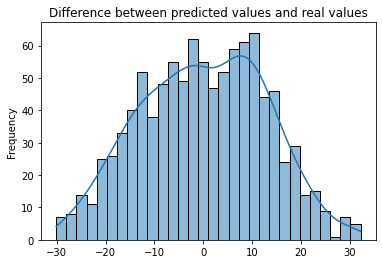

In [17]:
plot_error(error)

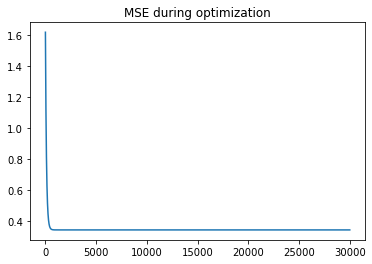

In [18]:
plot_cost(regression_2factors.cost)

In [19]:
regression_2factors.r2

0.3106464777258636

In [20]:
x1_grid, x2_grid = np.meshgrid(np.linspace(-2,2, 2),np.linspace(-2,2, 10))
z=weights[0]*x1_grid+weights[1]*x2_grid+bias

In [21]:
fp_bilan=denormalize(x1_grid,data['Fonds Propres/Bilan'])
evol_encours=denormalize(x2_grid,data['Evolution Encours/REX'])
score=denormalize(z,data['Score'])

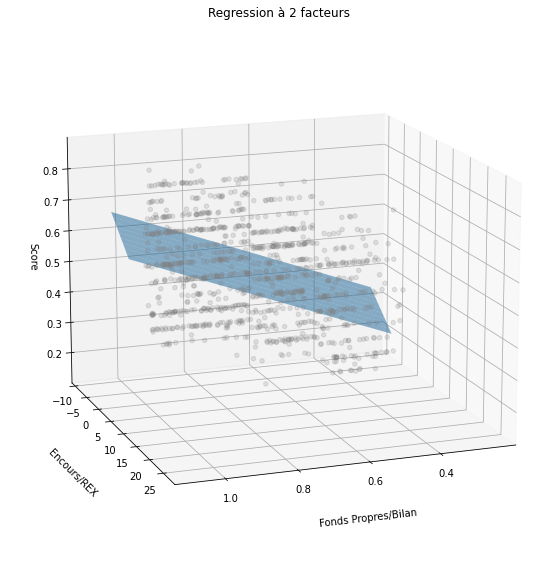

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Fonds Propres/Bilan'],data['Evolution Encours/REX'],data['Score'],c='grey',marker='o',alpha=0.2)
ax.plot_surface(fp_bilan,evol_encours,score,alpha=0.5)
ax.set_xlabel('Fonds Propres/Bilan',labelpad=20)
ax.set_ylabel('Encours/REX',labelpad=20)
ax.set_zlabel('Score')
ax.set_title('Regression à 2 facteurs')

elevation_angle = 15
azimuth_angle = 70
ax.view_init(elev=elevation_angle, azim=azimuth_angle)
plt.show()

## Regression on 7 factors

In [23]:
regression_7factors=LinearRegression(X,Y)

In [24]:
weights,bias=regression_7factors.fit(30000)
print(weights,bias)

[-0.00686042  0.10377916 -0.40492936  0.12103818  0.39332664 -0.12553766
 -0.30450947] [3.35839497e-15]


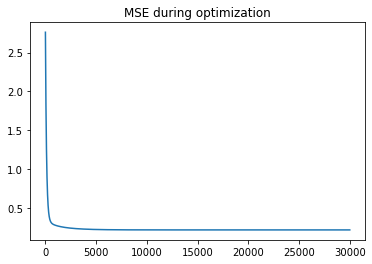

In [25]:
plot_cost(regression_7factors.cost)

In [26]:
error=regression_7factors.error()
error=denormalize(error,data['Score'])*100

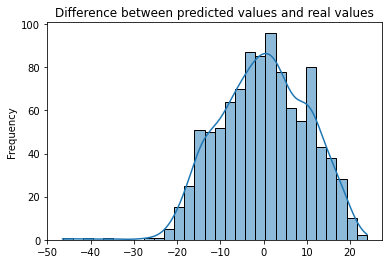

In [27]:
plot_error(error)

In [28]:
regression_7factors.t_stat

array([ -0.16115093,   4.94793516,  -5.89724169,   2.0227985 ,
        18.50681567,  -5.90390193, -14.49438525])

In [29]:
regression_7factors.r2

0.567562970448632

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X,Y)
reg.score(X,Y)

0.5675629769577915

# K-NN

In [31]:
class KNN:
    
    def __init__(self,X,Y,K,power=2):
        
        self.X=X
        self.Y=Y
        self.K=K
        self.p=power
        
    def distance(self,X,Y):
        
        return np.sum((X-Y)**self.p)**(1/self.p)
    
    def predict(self,X_train):
        
        metric=[]
        
        for X in self.X:
            
            position=np.where(self.X==X)[0][0]
            distances=self.distance(X_train,X)
            metric.append((position,distances,self.Y[position]))
            
        sorted_metric=np.array(sorted(metric,key=lambda metric: metric[1])[:self.K])
        
        return sorted_metric
    

    def accuracy(self,X_test,Y_test,predict_type='classification',threshold=0.05):
        
        accuracy=[]
        error=[]

        for i in range(len(X_test)):
            
            if predict_type=='classification':
                
                y_pred=self.predict(X_test[i])[:,-1].mean()
                y_pred_scaled=np.round(denormalize(y_pred,Y_test))
                accuracy.append(y_pred_scaled==Y_test[i])
                error.append(y_pred_scaled-Y_test[i])
                
            elif predict_type=='regression':
                
                y_pred=self.predict(X_test[i])[:,-1].mean()
                y_pred_scaled=np.round(denormalize(y_pred,Y_test),2)
                accuracy.append(y_pred_scaled-np.round(Y_test[i],2)<=threshold)
                error.append(y_pred_scaled-Y_test[i])
                
            else :
                raise ValueError("Prediction type should be regression or classification")


        accuracy=np.sum(accuracy)/len(accuracy)
        error=np.array(error)
        
        return accuracy,error
        
        
    
    

In [32]:
def plot_error_knn(error):
    fig = sns.histplot(data=error, bins=20)
    plt.ylabel("Frequency")
    plt.title("Difference between predicted values and real values")
    plt.show()

In [33]:
def plot_accuracy(accuracies):
    plt.plot(accuracies)
    plt.xlabel("Numbers of K")
    plt.title("Accuracy")
    plt.show()

In [34]:
def plot_score(x,y,z,color=None,elevation_angle=20,azimuth_angle = 15):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z,c=color,cmap='winter')
    ax.set_xlabel('Fonds Propres/Bilan',labelpad=20)
    ax.set_ylabel('Encours/REX',labelpad=20)
    ax.set_zlabel('Score')
    ax.view_init(elev=elevation_angle, azim=azimuth_angle)
    plt.show()

## 3 Dimensions example

In [35]:
X_train=np.array(data.iloc[:,:-2].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-1].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-1].values.tolist())[800:]
X_test=np.array(data.iloc[:,:-2].values.tolist())[800:]

In [36]:
X_train_normalized=normalize(X_train)[:,[-4,-3]]
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)[:,[-4,-3]]

## Classification

In [37]:
accuracies=[]

for i in range(1,30):
    
    KNN_3D=KNN(X_train_normalized,Y_train_normalized,i)
    accuracy=KNN_3D.accuracy(X_test_normalized,Y_test)[0]
    accuracies.append(accuracy)

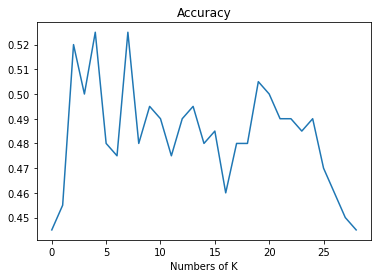

In [38]:
plot_accuracy(accuracies)

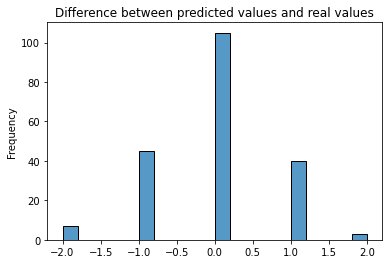

In [39]:
KNN_3D=KNN(X_train_normalized,Y_train_normalized,5)
accuracy, error=KNN_3D.accuracy(X_test_normalized,Y_test)
plot_error_knn(error)

In [40]:
KNN_3D=KNN(X_train_normalized,Y_train_normalized,5)
prediction=KNN_3D.predict(X_test_normalized[1])[:,-1]
prediction_denormalized=denormalize(prediction,Y_train).mean()
prediction_denormalized

2.6

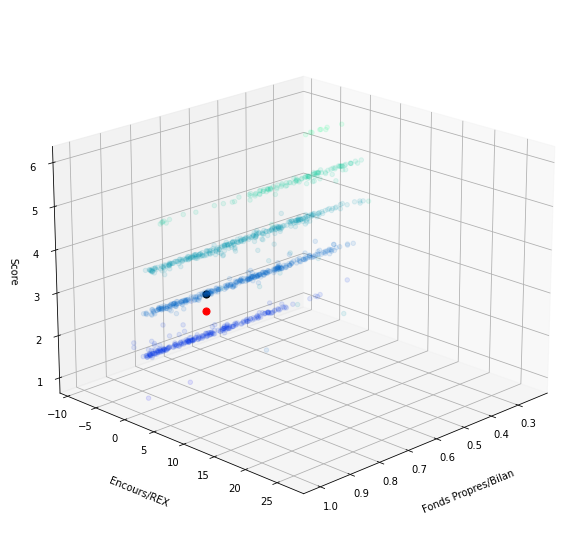

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Fonds Propres/Bilan'],data['Evolution Encours/REX'],data['New Score'],c=data['New Score'],alpha=0.10, cmap='winter')
ax.scatter(data['Fonds Propres/Bilan'].iloc[1],data['Evolution Encours/REX'].iloc[1],prediction_denormalized,c='red',alpha=1,s=50)
ax.scatter(data['Fonds Propres/Bilan'].iloc[1],data['Evolution Encours/REX'].iloc[1],data['New Score'].iloc[1],c='black',alpha=1,s=50)

ax.set_xlabel('Fonds Propres/Bilan',labelpad=20)
ax.set_ylabel('Encours/REX',labelpad=20)
ax.set_zlabel('Score')
elevation_angle = 20
azimuth_angle = 45
ax.view_init(elev=elevation_angle, azim=azimuth_angle)
plt.show()

In [42]:
pred=np.zeros(Y_train.shape[0])

In [43]:
for i in range(Y_train.shape[0]):
    pred[i]=np.round(denormalize(KNN_3D.predict(X_train_normalized[i])[:,-1].mean(),Y_train))

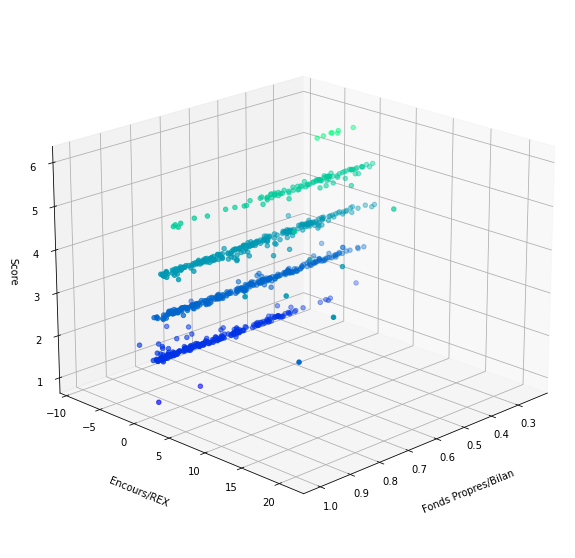

In [44]:
plot_score(data['Fonds Propres/Bilan'].iloc[:800],data['Evolution Encours/REX'].iloc[:800]
           ,data['New Score'].iloc[:800]
           ,color=data['New Score'].iloc[:800],
           azimuth_angle=45,elevation_angle=20)

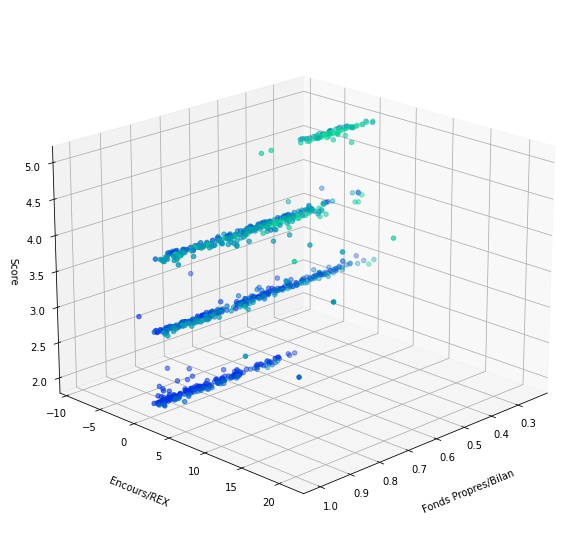

In [45]:
plot_score(data['Fonds Propres/Bilan'].iloc[:800],data['Evolution Encours/REX'].iloc[:800]
           ,pred
           ,color=data['New Score'].iloc[:800],
           azimuth_angle=45,elevation_angle=20)

## Regression

In [46]:
X_train=np.array(data.iloc[:,:-2].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-2].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-2].values.tolist())[800:]
X_test=np.array(data.iloc[:,:-2].values.tolist())[800:]

In [47]:
X_train_normalized=normalize(X_train)[:,[-4,-3]]
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)[:,[-4,-3]]

In [48]:
accuracies=[]

for i in range(1,30):
    
    KNN_3D=KNN(X_train_normalized,Y_train_normalized,i)
    accuracy=KNN_3D.accuracy(X_test_normalized,Y_test,predict_type='regression')[0]
    accuracies.append(accuracy)

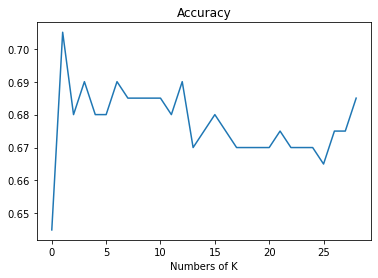

In [49]:
plot_accuracy(accuracies)

In [50]:
pred=np.zeros(Y_train.shape)
r_squared=[]

for k in range(1,30):
    KNN_3D=KNN(X_train_normalized,Y_train_normalized,k)
    for i in range(Y_train.shape[0]):
        pred[i]=denormalize(KNN_3D.predict(X_train_normalized[i])[:,-1].mean(),Y_train)
    
    r_squared.append(1-np.sum((pred-pred.mean())**2)/np.sum((Y_train-Y_train.mean())**2))

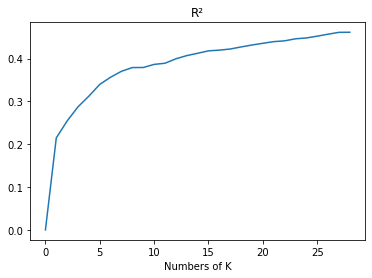

In [51]:
plt.plot(r_squared)
plt.xlabel("Numbers of K")
plt.title("R²")
plt.show()

In [52]:
KNN_3D=KNN(X_train_normalized,Y_train_normalized,2)
accuracy,error=KNN_3D.accuracy(X_test_normalized,Y_test,predict_type='regression')

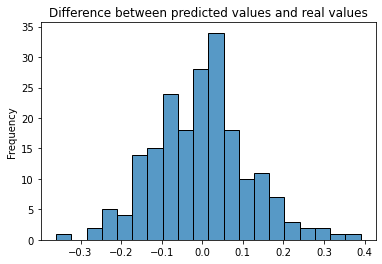

In [53]:
plot_error_knn(error)

In [54]:
prediction=KNN_3D.predict(X_test_normalized[9])[:,-1]
prediction_denormalized=denormalize(prediction,Y_train).mean()

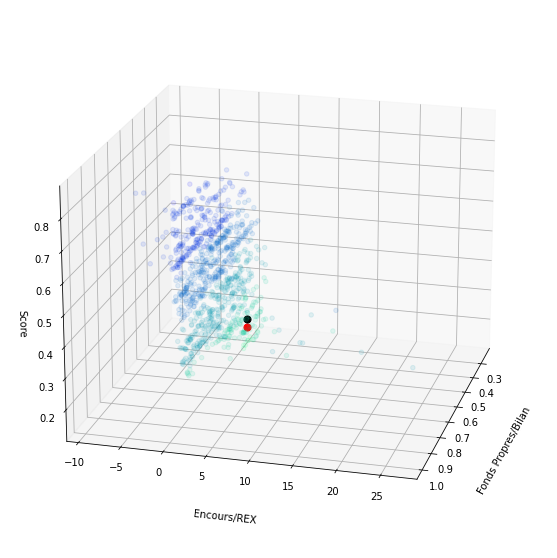

In [55]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Fonds Propres/Bilan'],data['Evolution Encours/REX'],data['Score'],c=data['New Score'],alpha=0.1,cmap='winter')
ax.scatter(data['Fonds Propres/Bilan'].iloc[809],data['Evolution Encours/REX'].iloc[809],prediction_denormalized,c='red',s=50)
ax.scatter(data['Fonds Propres/Bilan'].iloc[809],data['Evolution Encours/REX'].iloc[809],data['Score'].iloc[809],c='black',s=50)
ax.set_xlabel('Fonds Propres/Bilan',labelpad=20)
ax.set_ylabel('Encours/REX',labelpad=20)
ax.set_zlabel('Score')

elevation_angle = 20
azimuth_angle = 15
ax.view_init(elev=elevation_angle, azim=azimuth_angle)
plt.show()

In [56]:
KNN_3D=KNN(X_train_normalized,Y_train_normalized,2)
pred=np.zeros(Y_train.shape)
for i in range(Y_train.shape[0]):
    pred[i]=denormalize(KNN_3D.predict(X_train_normalized[i])[:,-1].mean(),Y_train)

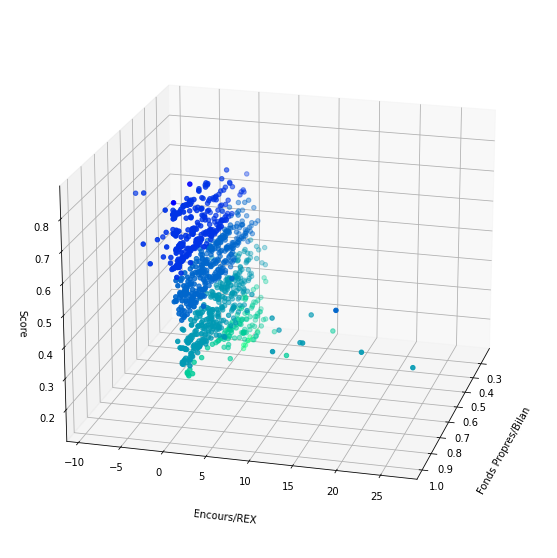

In [57]:
plot_score(data['Fonds Propres/Bilan'],data['Evolution Encours/REX'],data['Score'],color=data['New Score'])

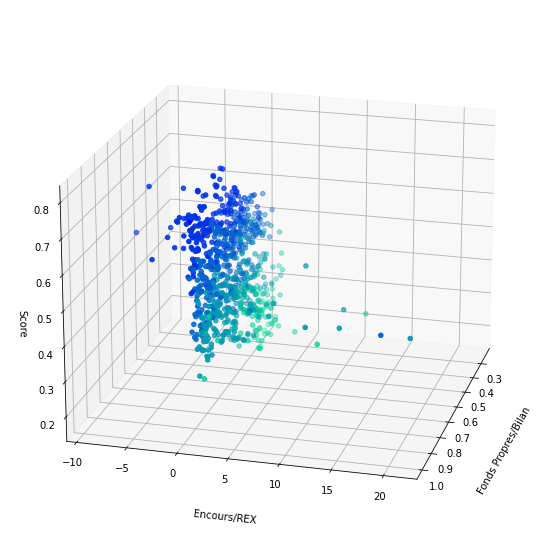

In [58]:
plot_score(data['Fonds Propres/Bilan'].iloc[:800],data['Evolution Encours/REX'].iloc[:800],pred,color=data['New Score'].iloc[:800])

## KNN on 7 features

## Classification

In [59]:
X_train=np.array(data.iloc[:,:-2].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-1].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-1].values.tolist())[800:]
X_test=np.array(data.iloc[:,:-2].values.tolist())[800:]

In [60]:
X_train_normalized=normalize(X_train)
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)

In [61]:
accuracies=[]

for i in range(1,30):
    
    knn=KNN(X_train_normalized,Y_train_normalized,i)
    accuracy=knn.accuracy(X_test_normalized,Y_test)[0]
    accuracies.append(accuracy)

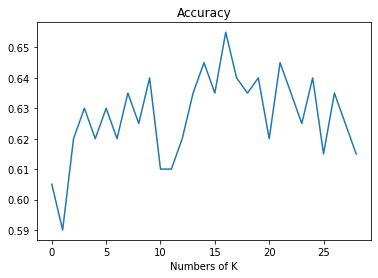

In [62]:
plot_accuracy(accuracies)

In [63]:
max(accuracies)

0.655

## Regression

In [64]:
X_train=np.array(data.iloc[:,:-2].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-2].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-2].values.tolist())[800:]
X_test=np.array(data.iloc[:,:-2].values.tolist())[800:]

In [65]:
X_train_normalized=normalize(X_train)
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)

In [66]:
accuracies=[]

for i in range(1,30):
    
    knn=KNN(X_train_normalized,Y_train_normalized,i)
    accuracy=knn.accuracy(X_test_normalized,Y_test,predict_type='regression')[0]
    accuracies.append(accuracy)
    

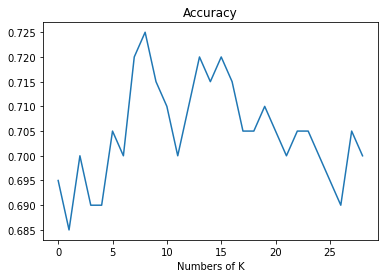

In [67]:
plot_accuracy(accuracies)

In [68]:
KNN_7=KNN(X_train_normalized,Y_train_normalized,2)

pred=np.zeros(Y_train.shape)
r_squared=[]

for k in range(1,30):
    KNN_7=KNN(X_train_normalized,Y_train_normalized,k)
    for i in range(Y_train.shape[0]):
        pred[i]=denormalize(KNN_7.predict(X_train_normalized[i])[:,-1].mean(),Y_train)
    
    r_squared.append(1-np.sum((pred-pred.mean())**2)/np.sum((Y_train-Y_train.mean())**2))

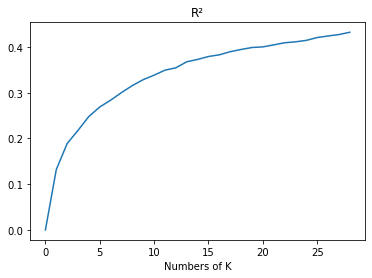

In [69]:
plt.plot(r_squared)
plt.xlabel("Numbers of K")
plt.title("R²")
plt.show()

# Neural Network

The code is from Omar Aflak : https://github.com/OmarAflak/Medium-Python-Neural-Network 

In [70]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [71]:
class FCLayer(Layer):

    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
    
    


In [72]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [73]:
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

In [74]:
def sigmoid(x):
    
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    
    return sigmoid(x)*(1-sigmoid(x))

In [75]:
def linear(x):
    return x

def linear_prime(x):
    return 1

In [76]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [77]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime


    def predict(self, input_data):

        samples = len(input_data)
        result = []


        for i in range(samples):

            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return np.array(result)

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)


        for i in range(epochs):
            err = 0
            for j in range(samples):

                output = x_train[j]
                
                for layer in self.layers:
                    output = layer.forward_propagation(output)


                err += self.loss(y_train[j], output)

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

# 2 features Neural Network

## 3D Regression

In [78]:
X_train=np.array(data.iloc[:,[-5,-3]].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-2].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-2].values.tolist())[800:]
X_test=np.array(data.iloc[:,[-5,-3]].values.tolist())[800:]

In [79]:
X_train_normalized=normalize(X_train)
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)

In [80]:
Y_train_normalized=Y_train_normalized.reshape(800,1)
X_train_normalized=X_train_normalized.reshape(800,1,2)
X_test_normalized=X_test_normalized.reshape(200,1,2)

In [81]:
net=Network()
net.add(FCLayer(input_size=2, output_size=3))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(input_size=3, output_size=1))
net.add(ActivationLayer(linear, linear_prime))
net.use(mse,mse_prime)
net.fit(X_train_normalized,Y_train_normalized,1000,0.01)

epoch 1/1000   error=0.625303
epoch 2/1000   error=0.424850
epoch 3/1000   error=0.396990
epoch 4/1000   error=0.377577
epoch 5/1000   error=0.365096
epoch 6/1000   error=0.356491
epoch 7/1000   error=0.351643
epoch 8/1000   error=0.348883
epoch 9/1000   error=0.347117
epoch 10/1000   error=0.345862
epoch 11/1000   error=0.344905
epoch 12/1000   error=0.344141
epoch 13/1000   error=0.343510
epoch 14/1000   error=0.342975
epoch 15/1000   error=0.342513
epoch 16/1000   error=0.342109
epoch 17/1000   error=0.341750
epoch 18/1000   error=0.341430
epoch 19/1000   error=0.341141
epoch 20/1000   error=0.340880
epoch 21/1000   error=0.340642
epoch 22/1000   error=0.340424
epoch 23/1000   error=0.340225
epoch 24/1000   error=0.340040
epoch 25/1000   error=0.339870
epoch 26/1000   error=0.339711
epoch 27/1000   error=0.339564
epoch 28/1000   error=0.339426
epoch 29/1000   error=0.339296
epoch 30/1000   error=0.339175
epoch 31/1000   error=0.339061
epoch 32/1000   error=0.338953
epoch 33/1000   e

In [82]:
predictions_train=denormalize(net.predict(X_train_normalized),data['Score'])
predictions_test=denormalize(net.predict(X_test_normalized),data['Score'])

In [83]:
accuracy_train=np.sum(abs(predictions_train-Y_train.reshape(800,1,1))<0.05)/Y_train.shape[0]
accuracy_test=np.sum(abs(predictions_test-Y_test.reshape(200,1,1))<0.05)/Y_test.shape[0]

In [84]:
accuracy_train,accuracy_test

(0.385, 0.38)

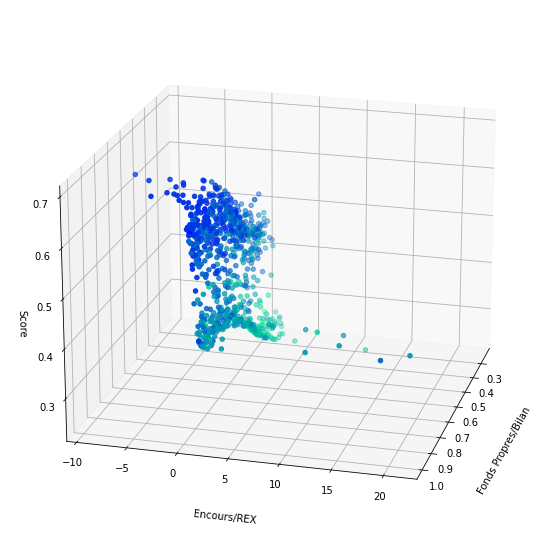

In [85]:
plot_score(data['Fonds Propres/Bilan'].iloc[:800],data['Evolution Encours/REX'].iloc[:800],predictions_train,color=data['New Score'].iloc[:800])

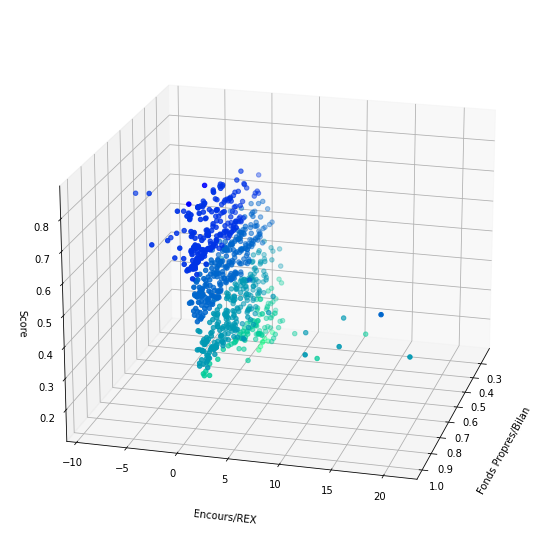

In [86]:
plot_score(data['Fonds Propres/Bilan'].iloc[:800],data['Evolution Encours/REX'].iloc[:800],data['Score'].iloc[:800],color=data['New Score'].iloc[:800])

## 3D Classification

In [87]:
X_train=np.array(data.iloc[:,[-5,-3]].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-1].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-1].values.tolist())[800:]
X_test=np.array(data.iloc[:,[-5,-3]].values.tolist())[800:]

In [88]:
X_train_normalized=normalize(X_train)
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)

In [89]:
Y_train_normalized=Y_train_normalized.reshape(800,1)
X_train_normalized=X_train_normalized.reshape(800,1,2)
X_test_normalized=X_test_normalized.reshape(200,1,2)

In [90]:
net=Network()
net.add(FCLayer(input_size=2, output_size=3))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(input_size=3, output_size=1))
net.add(ActivationLayer(linear, linear_prime))
net.use(mse,mse_prime)
net.fit(X_train_normalized,Y_train_normalized,1000,0.01)

epoch 1/1000   error=0.568207
epoch 2/1000   error=0.469288
epoch 3/1000   error=0.451278
epoch 4/1000   error=0.442029
epoch 5/1000   error=0.435625
epoch 6/1000   error=0.430119
epoch 7/1000   error=0.424542
epoch 8/1000   error=0.418282
epoch 9/1000   error=0.410941
epoch 10/1000   error=0.402420
epoch 11/1000   error=0.393811
epoch 12/1000   error=0.387367
epoch 13/1000   error=0.383661
epoch 14/1000   error=0.381565
epoch 15/1000   error=0.380130
epoch 16/1000   error=0.378951
epoch 17/1000   error=0.377895
epoch 18/1000   error=0.376916
epoch 19/1000   error=0.375997
epoch 20/1000   error=0.375125
epoch 21/1000   error=0.374292
epoch 22/1000   error=0.373491
epoch 23/1000   error=0.372722
epoch 24/1000   error=0.371984
epoch 25/1000   error=0.371280
epoch 26/1000   error=0.370611
epoch 27/1000   error=0.369977
epoch 28/1000   error=0.369380
epoch 29/1000   error=0.368818
epoch 30/1000   error=0.368287
epoch 31/1000   error=0.367778
epoch 32/1000   error=0.367277
epoch 33/1000   e

In [91]:
predictions_train=np.round(denormalize(net.predict(X_train_normalized),data['New Score']))
predictions_test=np.round(denormalize(net.predict(X_test_normalized),data['New Score']))

In [92]:
accuracy_train=np.sum(predictions_train==Y_train.reshape(800,1,1))/Y_train.shape[0]
accuracy_test=np.sum(predictions_test==Y_test.reshape(200,1,1))/Y_test.shape[0]
accuracy_train,accuracy_test

(0.5875, 0.57)

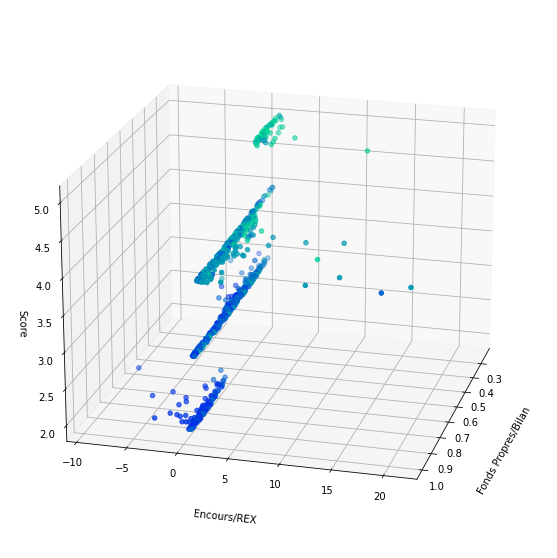

In [93]:
plot_score(data['Fonds Propres/Bilan'].iloc[:800],data['Evolution Encours/REX'].iloc[:800],predictions_train,color=data['New Score'].iloc[:800])

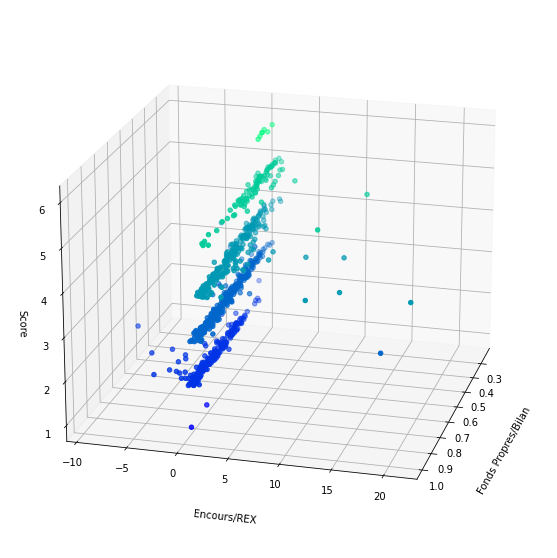

In [94]:
plot_score(data['Fonds Propres/Bilan'].iloc[:800],data['Evolution Encours/REX'].iloc[:800],data['New Score'].iloc[:800],color=data['New Score'].iloc[:800])

# 7 features Neural Network

## Regression

In [95]:
X_train=np.array(data.iloc[:,:-2].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-2].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-2].values.tolist())[800:]
X_test=np.array(data.iloc[:,:-2].values.tolist())[800:]

In [96]:
X_train_normalized=normalize(X_train)
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)

In [97]:
Y_train_normalized=Y_train_normalized.reshape(800,1)
X_train_normalized=X_train_normalized.reshape(800,1,7)
X_test_normalized=X_test_normalized.reshape(200,1,7)

In [98]:
net=Network()
net.add(FCLayer(input_size=7, output_size=3))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(input_size=3, output_size=1))
net.add(ActivationLayer(linear, linear_prime))
net.use(mse,mse_prime)
net.fit(X_train_normalized,Y_train_normalized,1000,0.01)

epoch 1/1000   error=0.401274
epoch 2/1000   error=0.205084
epoch 3/1000   error=0.174109
epoch 4/1000   error=0.159222
epoch 5/1000   error=0.151031
epoch 6/1000   error=0.145937
epoch 7/1000   error=0.142121
epoch 8/1000   error=0.139117
epoch 9/1000   error=0.136771
epoch 10/1000   error=0.134995
epoch 11/1000   error=0.133641
epoch 12/1000   error=0.132566
epoch 13/1000   error=0.131678
epoch 14/1000   error=0.130925
epoch 15/1000   error=0.130274
epoch 16/1000   error=0.129700
epoch 17/1000   error=0.129183
epoch 18/1000   error=0.128706
epoch 19/1000   error=0.128256
epoch 20/1000   error=0.127829
epoch 21/1000   error=0.127432
epoch 22/1000   error=0.127062
epoch 23/1000   error=0.126714
epoch 24/1000   error=0.126384
epoch 25/1000   error=0.126067
epoch 26/1000   error=0.125763
epoch 27/1000   error=0.125469
epoch 28/1000   error=0.125184
epoch 29/1000   error=0.124906
epoch 30/1000   error=0.124634
epoch 31/1000   error=0.124367
epoch 32/1000   error=0.124105
epoch 33/1000   e

In [99]:
predictions_train=denormalize(net.predict(X_train_normalized),data['Score'])
predictions_test=denormalize(net.predict(X_test_normalized),data['Score'])

In [100]:
accuracy_train=np.sum(abs(predictions_train-Y_train.reshape(800,1,1))<0.05)/Y_train.shape[0]
accuracy_test=np.sum(abs(predictions_test-Y_test.reshape(200,1,1))<0.05)/Y_test.shape[0]

In [101]:
accuracy_train,accuracy_test

(0.705, 0.63)

## Classification

In [102]:
X_train=np.array(data.iloc[:,:-2].values.tolist())[:800]
Y_train=np.array(data.iloc[:,-1].values.tolist())[:800]
Y_test=np.array(data.iloc[:,-1].values.tolist())[800:]
X_test=np.array(data.iloc[:,:-2].values.tolist())[800:]

In [103]:
X_train_normalized=normalize(X_train)
Y_train_normalized=normalize(Y_train)
X_test_normalized=normalize(X_test)

In [104]:
Y_train_normalized=Y_train_normalized.reshape(800,1)
X_train_normalized=X_train_normalized.reshape(800,1,7)
X_test_normalized=X_test_normalized.reshape(200,1,7)

In [105]:
net=Network()
net.add(FCLayer(input_size=7, output_size=3))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(input_size=3, output_size=1))
net.add(ActivationLayer(linear, linear_prime))
net.use(mse,mse_prime)
net.fit(X_train_normalized,Y_train_normalized,1000,0.01)

epoch 1/1000   error=0.382213
epoch 2/1000   error=0.279791
epoch 3/1000   error=0.262194
epoch 4/1000   error=0.251242
epoch 5/1000   error=0.234795
epoch 6/1000   error=0.224594
epoch 7/1000   error=0.220591
epoch 8/1000   error=0.217924
epoch 9/1000   error=0.215882
epoch 10/1000   error=0.213608
epoch 11/1000   error=0.211048
epoch 12/1000   error=0.209294
epoch 13/1000   error=0.208031
epoch 14/1000   error=0.206855
epoch 15/1000   error=0.205791
epoch 16/1000   error=0.204818
epoch 17/1000   error=0.203927
epoch 18/1000   error=0.203104
epoch 19/1000   error=0.202337
epoch 20/1000   error=0.201614
epoch 21/1000   error=0.200923
epoch 22/1000   error=0.200259
epoch 23/1000   error=0.199634
epoch 24/1000   error=0.199076
epoch 25/1000   error=0.198588
epoch 26/1000   error=0.198147
epoch 27/1000   error=0.197742
epoch 28/1000   error=0.197368
epoch 29/1000   error=0.197013
epoch 30/1000   error=0.196675
epoch 31/1000   error=0.196347
epoch 32/1000   error=0.196031
epoch 33/1000   e

In [106]:
predictions_train=np.round(denormalize(net.predict(X_train_normalized),data['New Score']))
predictions_test=np.round(denormalize(net.predict(X_test_normalized),data['New Score']))

In [107]:
accuracy_train=np.sum(predictions_train==Y_train.reshape(800,1,1))/Y_train.shape[0]
accuracy_test=np.sum(predictions_test==Y_test.reshape(200,1,1))/Y_test.shape[0]
accuracy_train,accuracy_test


(0.79, 0.76)